In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("netflix_titles.csv")

# Basic Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Percentage of data missing in each column

In [6]:
(df.isna().sum()/len(df)) * 100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

# handling missing values in the dataframe

In [8]:
df_modified=df.copy()

In [9]:
df_modified['director'] = df_modified['director'].fillna('Director_Unkown')
df_modified['cast'] = df_modified['cast'].fillna('Cast_Unkown')
df_modified['country'] = df_modified['country'].fillna('Country_Unknown')
df_modified.dropna(inplace=True)

In [10]:
print('Null value count after modification')
df_modified.isna().sum()

Null value count after modification


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# country having most netflix content

In [12]:
temp=df_modified['country'].value_counts().reset_index().head(10)
temp

,country,count
0,United States,2809
1,India,972
2,Country_Unknown,829
3,United Kingdom,418
4,Japan,243
5,South Korea,199
6,Canada,181
7,Spain,145
8,France,124
9,Mexico,110


In [13]:
df['description']

0       As her father nears the end of his life, filmm...
1       After crossing paths at a party, a Cape Town t...
2       To protect his family from a powerful drug lor...
3       Feuds, flirtations and toilet talk go down amo...
4       In a city of coaching centers known to train I...
                              ...                        
8802    A political cartoonist, a crime reporter and a...
8803    While living alone in a spooky town, a young g...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
8806    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 8807, dtype: object

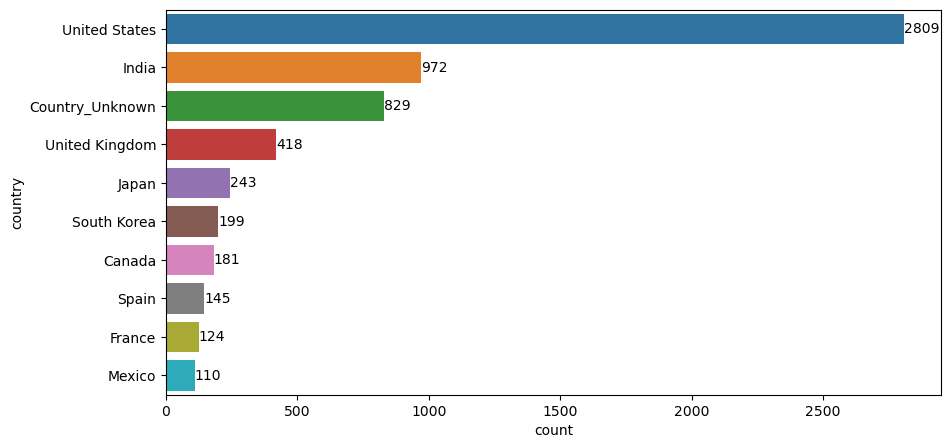

In [14]:
plt.figure(figsize=(10,5))
ax=sns.barplot(y='country',x='count', data=temp,hue='country')
for ct in ax.containers:
    ax.bar_label(ct)

# number of movies and tv series

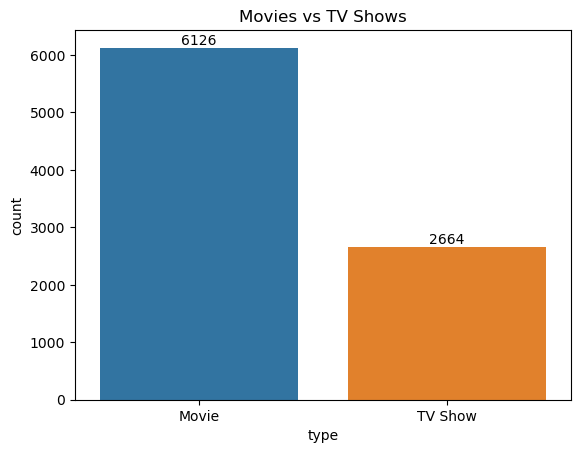

In [16]:
ax=sns.countplot(x='type', data=df_modified,hue='type')
for ct in ax.containers:
    ax.bar_label(ct)
plt.title('Movies vs TV Shows')
plt.show()

In [17]:
df['date_added']

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

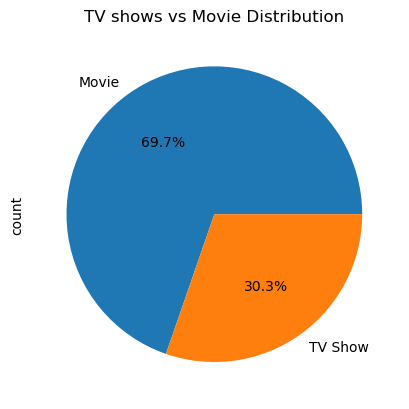

In [18]:
df_modified['type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('TV shows vs Movie Distribution')
plt.show()

# which month has the most movie releases

- the date added is a string in format: month day, year 
- I have create 1 column month_added form this

In [21]:
df_modified['month_added']=df_modified['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

In [22]:
df_modified['month_added']

0       September
1       September
2       September
3       September
4       September
          ...    
8802     November
8803         July
8804     November
8805      January
8806        March
Name: month_added, Length: 8790, dtype: object

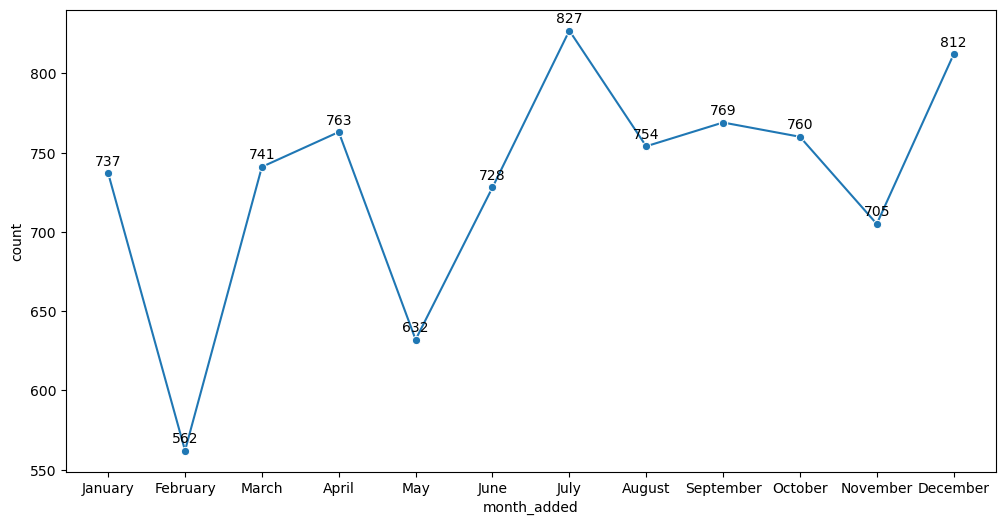

In [23]:
# line plot for month_added using month order 
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

df_modified['month_added'] = pd.Categorical(df_modified['month_added'], categories=month_order, ordered=True)

# Count how many entries were added in each month
temp = df_modified['month_added'].value_counts().reindex(month_order).reset_index()
temp.columns = ['month_added', 'count']

# Plotting the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='month_added', y='count', data=temp, marker='o')
for x,y in zip(temp['month_added'],temp['count']): 
    plt.text(x,y+5,str(y),ha='center')
plt.show()


# number of movies released with respect to year 

In [25]:
temp=df_modified['release_year'].value_counts().sort_values(ascending=False).reset_index().head(10) 
temp

,release_year,count
0,2018,1146
1,2017,1030
2,2019,1030
3,2020,953
4,2016,901
5,2021,592
6,2015,555
7,2014,352
8,2013,286
9,2012,236


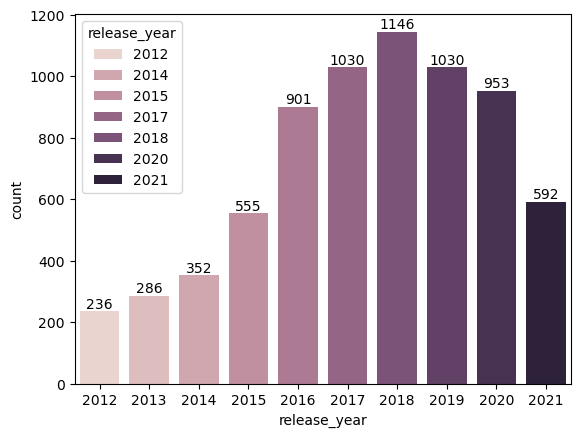

In [26]:
ax=sns.barplot(x='release_year',y='count',data=temp,hue='release_year')
for ct in ax.containers:
    ax.bar_label(ct)

# rating analysis

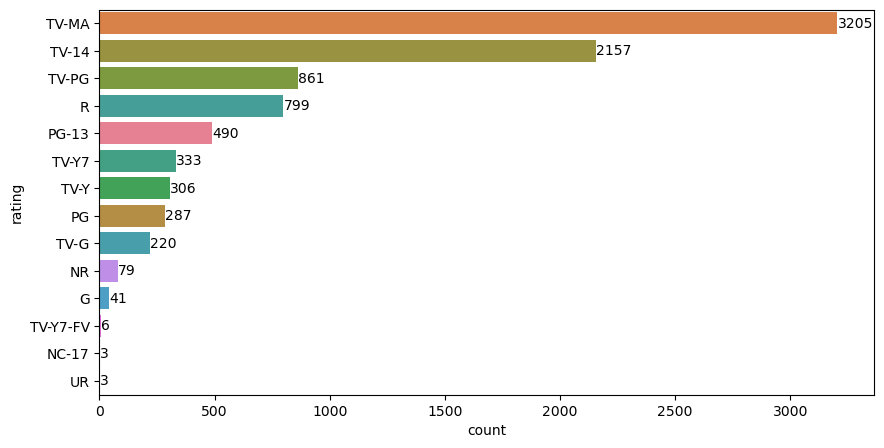

In [28]:
plt.figure(figsize=(10,5))
ax=sns.countplot(y='rating',data=df_modified,order=df_modified['rating'].value_counts().index[0:15],hue='rating')
for ct in ax.containers: 
    ax.bar_label(ct)
plt.show()

# finding different genres in the dataframe 

In [30]:
genres=pd.DataFrame(df_modified['listed_in'].str.split(',').explode().str.strip().value_counts().sort_values(ascending=False))

In [31]:
df['listed_in']

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

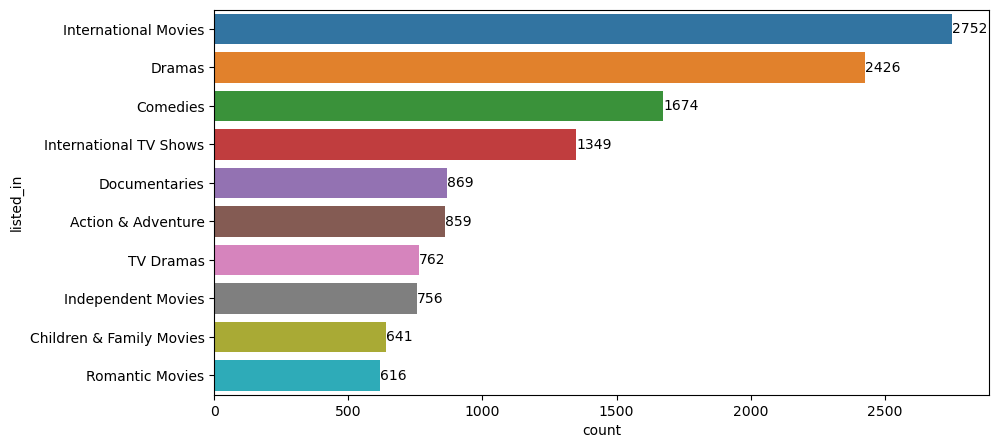

In [32]:
#plot for the top 10 genres 
plt.figure(figsize=(10,5))
ax=sns.barplot(y='listed_in',x='count',data=genres.head(10),hue='listed_in')
for ct in ax.containers: 
    ax.bar_label(ct)
plt.show()

# directors with most movies on netflix

In [34]:
temp=df_modified['director'].str.split(',').explode().str.strip().value_counts().sort_values(ascending=False).reset_index().iloc[1:10,:]

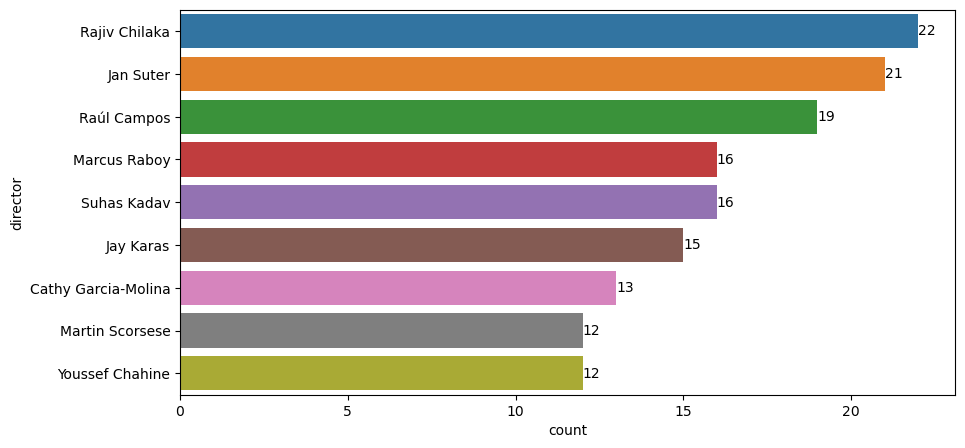

In [35]:
plt.figure(figsize=(10,5))
ax=sns.barplot(y='director',x='count',data=temp,hue='director')
for ct in ax.containers: 
    ax.bar_label(ct)
plt.show()

# actors with most movies on netflix 

In [37]:
temp=pd.DataFrame(df_modified['cast'].str.split(',').explode().str.strip().value_counts().sort_values(ascending=False)[1:])

# plot for top 5 actors

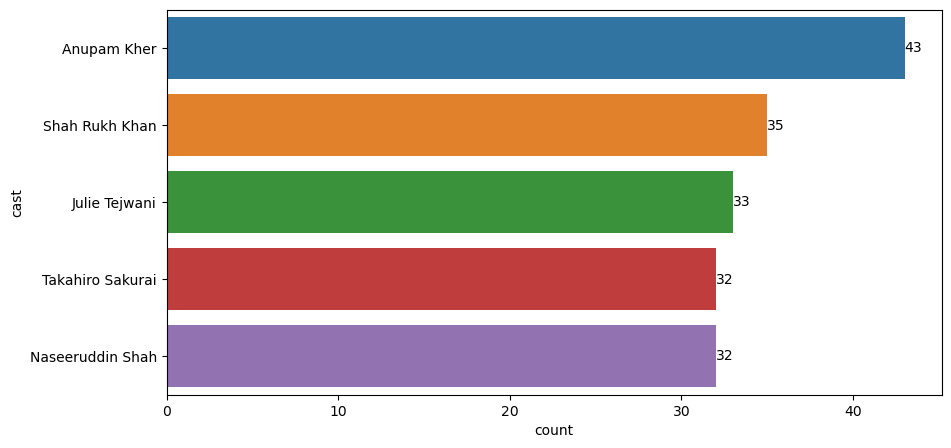

In [39]:
plt.figure(figsize=(10,5))
ax=sns.barplot(y='cast',x='count',data=temp.head(5),hue='cast')
for ct in ax.containers: 
    ax.bar_label(ct)
plt.show()